In [33]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

In [3]:
# Save data URL
url = "http://www.rossmanchance.com/iscam3/data/USbirthsJan2016.txt"

# Use pandas to read in the data from the URL
birthweights = pd.read_csv(url, sep = "\s+")
birthweights.head()

,date,birthweight,5_min_apgar,mom_weight_gain(lbs),full_term?,mom_age,mom_race,marital_status,dad_age,dad_race,mom_BMI,num,sex,weeks,no_inf
0,2016Jan,3705,9,25,1,35,1,1,5,1,31.5,1,F,40,True
1,2016Jan,3204,9,35,1,32,4,1,5,4,24.2,1,F,39,True
2,2016Jan,4499,9,35,1,18,3,2,2,3,23.8,1,M,39,True
3,2016Jan,3660,9,26,1,34,1,2,6,1,30.9,1,M,46,True
4,2016Jan,2866,9,43,1,31,4,1,5,4,23.8,1,F,39,True


In [4]:
# Check number of rows in dataset
len(birthweights)

317445

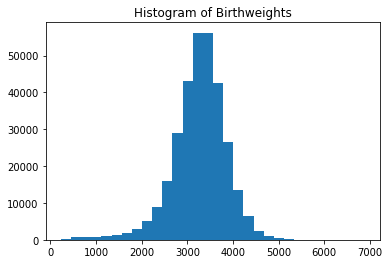

In [28]:
###### The next part of this lesson has the student create a dotplot of the 
###### birth weights. I wasn't able to find a convenient way to do this, so
###### I skipped this portion and created histograms.

# Create a histogram with numpy
plt.hist(birthweights.birthweight, bins = 30)
plt.title("Histogram of Birthweights")
plt.show()

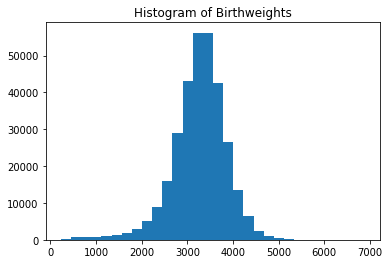

In [27]:
# Note that there are some birthweights entered as 9999. We'll want to 
# remove these observations:

# First create variable that stores values of "True" for birthweights smaller
# than the largest one, 8165 grams (from text)
plausible_bw = birthweights['birthweight'] < 8166
# Then select the observations which fit that condition and save a new data frame
bw_clean1 = birthweights[plausible_bw]
# Create another histogram to confirm
plt.hist(bw_clean1.birthweight, bins = 30)
plt.title("Histogram of Birthweights")
plt.show()

In [21]:
# To get an idea of shape, center, and spread of the birthweights nymerically,
# quickly summarize the variable with the pandas 'describe' function(?)
bw_clean1.birthweight.describe()

count    317037.000000
mean       3259.111236
std         592.148805
min         227.000000
25%        2958.000000
50%        3297.000000
75%        3629.000000
max        6897.000000
Name: birthweight, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

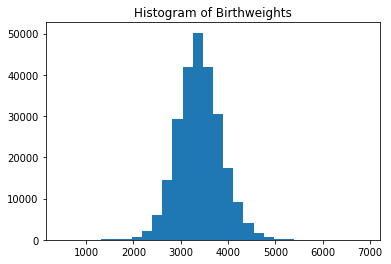

In [26]:
# Now subset the cleaned dataset by whether the pregnancy lasted at least 37
# weeks and less than 99 weeks
bw_clean2 =  bw_clean1[(bw_clean1['weeks'] > 37) & (bw_clean1['weeks'] < 99)]
plt.hist(bw_clean2.birthweight, bins = 30)
plt.title("Histogram of Birthweights")
plt.show

In [24]:
# Once again, use descirbe to summarize the new, cleaner dataset
bw_clean2.birthweight.describe()

count    251045.000000
mean       3395.587225
std         459.850870
min         464.000000
25%        3090.000000
50%        3380.000000
75%        3685.000000
max        6897.000000
Name: birthweight, dtype: float64

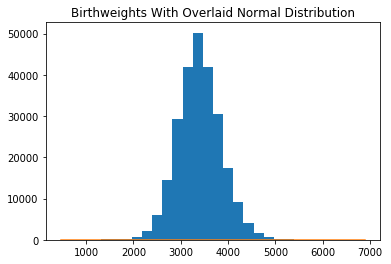

In [41]:
# Next we'd like to overlay a normal distribution on the histogram of the cleaned
# data to visually assess the fit of the data

# Use scipy.stats to generate a normal  distribution based on the data values
# for mean and standard deviation, then generate the histogram from earlier
mu, sd = norm.fit(bw_clean2.birthweight)
plt.hist(bw_clean2.birthweight, bins = 30)

# Python will require that we do a little more to help build the plot of the 
# normal distribution than R does, so we'll start by telling it what range of
#values of X to plot over
xmin = bw_clean2.birthweight.min()
xmax = bw_clean2.birthweight.max()
xrange = np.linspace(xmin, xmax, 1000)

# With that, generate the normal distribution
pdf = norm.pdf(xrange, mu, sd)

# Then add the created distribution to the plot
plt.plot(xrange, pdf)

# Add a title and display the finished graph
plt.title("Birthweights With Overlaid Normal Distribution")
plt.show()

In [39]:
xmax

6897